# Projeto Sharck Atack

#### Perguntas a serem respondidas com esta analise.
#### 1 - Quais as atividades com maior risco de ataque de tubarões? 
#### 2 - Quais os tubarões com maior taxa de ataque? 
#### 3 - Quais estações do ano existe mais ataques? ** 


## Primeiro passo importar as bibliotecas que foram utilizadas durante a analise do projeto

In [1]:
import numpy as np
import pandas as pd
import re

### Localizando o arquivo

In [2]:
pwd

'C:\\Users\\Erick\\Documents\\IronHack\\Projeto 1'

### carregar o arquivo dentro de um dataFrame, para poder fazer analises basicas de como está a base, tamanho e formato de dados

In [3]:
df = pd.read_csv('C:\\Users\\Erick\\Documents\\IronHack\\Projeto 1\\attacks.csv', delimiter=',')

In [4]:
species = ('zebra shark', 'wobbegong shark', 'whale shark', 'tiger shark',
       'thresher shark', 'spiny dogfish shark', 'sandtiger shark',
       'port jackson shark', 'nurse shark', 'mako shark',
       'hammerhead shark', 'white shark', 'goblin shark',
       'cookiecutter shark', 'bull shark', 'blue shark', 'blacktip shark',
       'basking shark', 'angel shark')

In [5]:
df.columns = [x.lower().strip() for x in df.columns]

In [6]:
df.columns

Index(['case number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal (y/n)', 'time',
       'species', 'investigator or source', 'pdf', 'href formula', 'href',
       'case number.1', 'case number.2', 'original order', 'unnamed: 22',
       'unnamed: 23'],
      dtype='object')

### Aqui separei as colunas que iria utilizar para que o DataFrame não ficasse poluido com informações que não seriam utilizadas ainda/nessa 

In [7]:
columns_to_analyze = ['date', 'type', 'country', 'area', 'activity', 'sex', 'fatal (y/n)','species', 'time']

In [8]:
columns_to_drop = [column for column in df.columns if column not in columns_to_analyze]

df.drop(columns=columns_to_drop, inplace=True)

### Visualizando e corrigindo os metodos de dados que estavam bagunçados dentro da Coluna 'Fatal Y/N'

In [9]:
df = df.dropna()

In [10]:
df.columns

Index(['date', 'type', 'country', 'area', 'activity', 'sex', 'fatal (y/n)',
       'time', 'species'],
      dtype='object')

In [11]:
df['fatal (y/n)'].value_counts()

N          1406
Y           250
 N            2
UNKNOWN       1
M             1
2017          1
Name: fatal (y/n), dtype: int64

In [12]:
# removendo espaços em branco para melhorar a visualização
df['fatal (y/n)'] = df['fatal (y/n)'].str.strip() 

In [13]:
# Corrigindo por meio de replace a letra M
df['fatal (y/n)'] = df['fatal (y/n)'].str.upper().str.replace('M', 'N') #.value_counts()

In [14]:
# Definindo 2017 como algo conhecido, inferencia, porém necessario para melhorar a analise
df['fatal (y/n)'] = df['fatal (y/n)'].str.upper().str.replace('2017', 'UNKNOWN') #.value_counts()

In [15]:
df['species'] = df['species'].str.lower()

In [16]:
df.species.value_counts()

white shark                                        92
tiger shark                                        39
4' shark                                           35
bull shark                                         35
1.8 m [6'] shark                                   23
                                                   ..
hammerhead shark. 6' to 7'                          1
tiger shark, 4 m                                    1
white shark, 2.1 m [7']  based on tooth pattern     1
1.3 to 1.6 m shark                                  1
1.5 m [5'] dusky shark                              1
Name: species, Length: 923, dtype: int64

In [17]:
df['type'] = df['type'].str.replace('Boatomg', 'Boating')

In [18]:
def normalize_species(x):
    try:
        for specie in species:
            if specie in x:
                return specie
        return 'Others'
    except:
        return 'Others'

df['species'] = df['species'].str.lower()    
df['species_normalized'] = df['species'].map(normalize_species)
df[df.species_normalized=='Others']['species'].dropna()

10                                   grey reef shark
13                                  invalid incident
16                   shark involvement not confirmed
20                                      questionable
21                                         3 m shark
                            ...                     
5853                                       13' shark
5882                                       68" shark
5910                                      wobbegongs
5922    identified as c. gangeticus by dr. j. fayrer
5970                                       16' shark
Name: species, Length: 791, dtype: object

<AxesSubplot:>

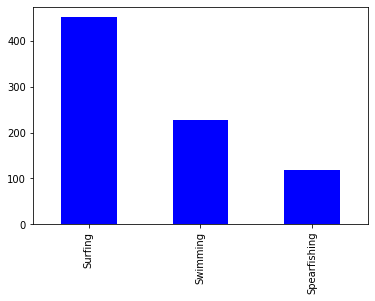

In [24]:
df.groupby("activity").filter(lambda x: len(x) > 100).activity.value_counts(ascending=False).plot.bar(color='blue')

<AxesSubplot:>

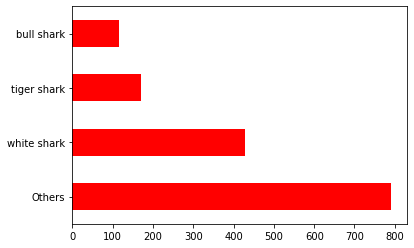

In [41]:
sharks = df['species_normalized'].value_counts()
sharks[sharks>50].head(10).plot.barh(color='red')